In [5]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import os


# Preprocess text
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove punctuation/numbers
    return words


# Compute word frequencies
def get_word_frequencies(words):
    return Counter(words)


# Read and collect word frequencies from directory
def read_and_collect_frequencies_from_directory(directory_path):
    all_frequencies = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):  # Only read .txt files
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()  # Read the text file
                words = preprocess_text(text)  # Preprocess the text (tokenize, lowercase, remove punctuation)
                frequencies = get_word_frequencies(words)  # Get word frequencies
                all_frequencies.append((filename, frequencies))  # Store file name and its frequencies
    return all_frequencies


# Create theoretical Zipf distribution
def get_theoretical_zipf_distribution(num_words, s):
    ranks = np.arange(1, num_words + 1)
    theoretical_zipf = 1 / (ranks ** s)  # Theoretical Zipf distribution
    theoretical_zipf /= np.sum(theoretical_zipf)  # Normalize to make it a probability distribution
    return theoretical_zipf


# Get Q-Q Plot for each txt file, and set paremeter as 1.15
def plot_qq_for_zipf_law(all_frequencies, s=.9):
    for filename, frequencies in all_frequencies:
        # Step 1: Get the word frequencies sorted in descending order
        word_counts = np.array([count for word, count in frequencies.most_common()])
        num_words = len(word_counts)

        print('Summary of ', filename, ':')
        print('Number of different words: ', num_words)
        print('Number of all words: ', np.sum(word_counts))
        
        # Step 2: Create the theoretical Zipf distribution
        theoretical_zipf = get_theoretical_zipf_distribution(num_words, s)

        # Step 3: Normalize word counts to make them a probability distribution
        word_probabilities = word_counts / np.sum(word_counts)

        # Step 4: Get Quantiles
        zipf_quantile = np.cumsum(np.flip(theoretical_zipf))
        word_quantile = np.cumsum(np.flip(word_probabilities))

        # Step 5: Generate the QQ plot
        plt.figure(figsize=(4, 4))
        plt.scatter(zipf_quantile, word_quantile, alpha=0.6, label='Actual vs Theoretical')

        # Plot a reference line (y=x) to visualize deviation from Zipf law
        max_val = max(max(zipf_quantile), max(word_quantile))
        plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

        plt.title(f'QQ Plot for Zipf Law - {filename}')
        plt.xlabel('Theoretical Quantiles (Zipf)')
        plt.ylabel('Actual Quantiles (Word Frequencies)')
        plt.grid(True)
        plt.legend()
        plt.show()

Summary of  10.txt :
Number of different words:  715
Number of all words:  2387


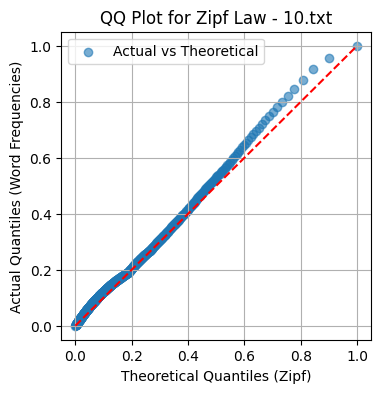

Summary of  9.txt :
Number of different words:  532
Number of all words:  1437


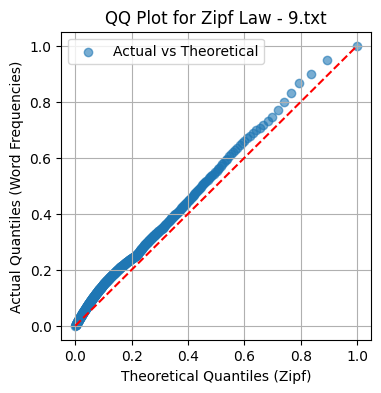

Summary of  8.txt :
Number of different words:  3101
Number of all words:  13705


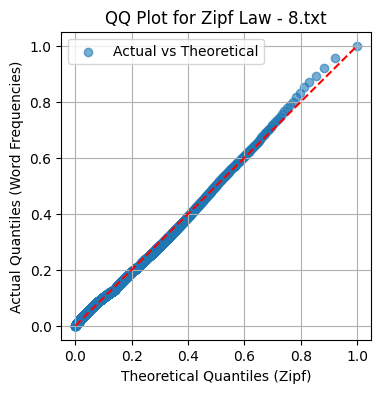

Summary of  5.txt :
Number of different words:  1189
Number of all words:  4870


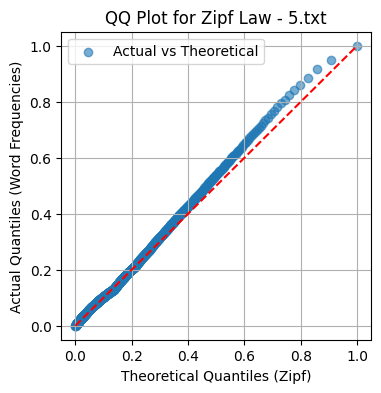

Summary of  4.txt :
Number of different words:  1886
Number of all words:  9744


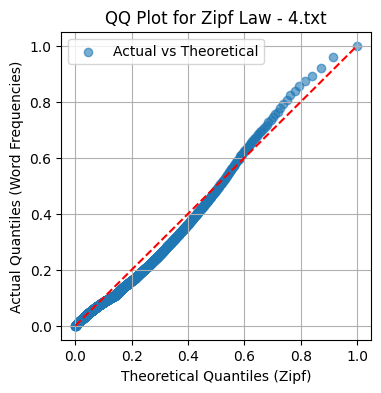

Summary of  6.txt :
Number of different words:  1741
Number of all words:  10288


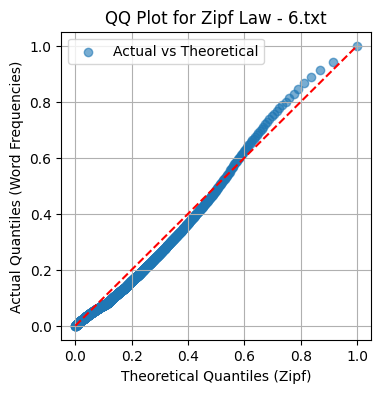

Summary of  7.txt :
Number of different words:  3205
Number of all words:  13262


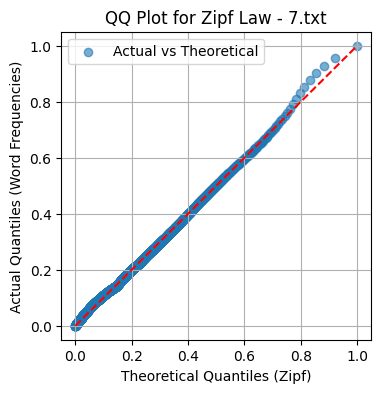

Summary of  3.txt :
Number of different words:  2316
Number of all words:  17064


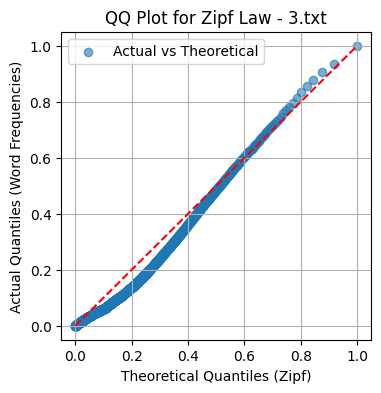

Summary of  2.txt :
Number of different words:  1073
Number of all words:  5347


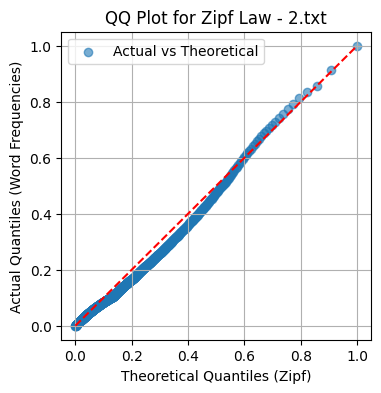

Summary of  1.txt :
Number of different words:  1348
Number of all words:  4422


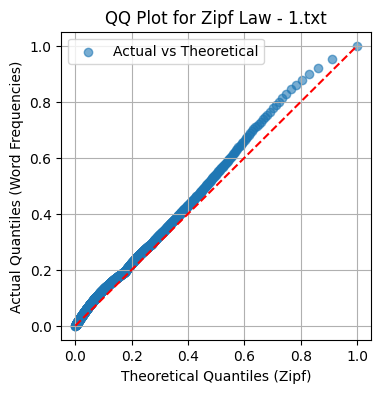

Summary of  AI_text_1.txt :
Number of different words:  531
Number of all words:  1096


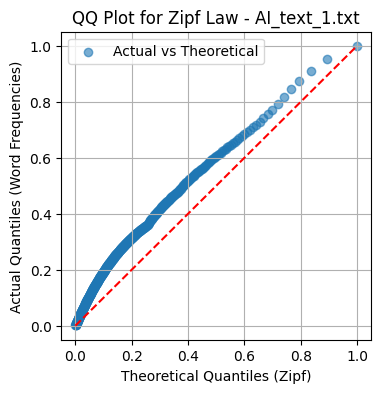

Summary of  AI_text_2.txt :
Number of different words:  397
Number of all words:  39652


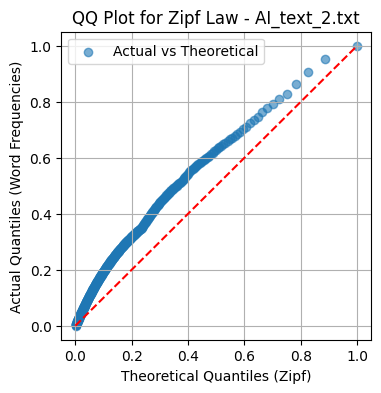

In [6]:
human_texts_path = 'human'
AI_texts_path = 'AI'

human_frequencies = read_and_collect_frequencies_from_directory(human_texts_path)
AI_frequencies = read_and_collect_frequencies_from_directory(AI_texts_path)
all_frequencies = human_frequencies + AI_frequencies

plot_qq_for_zipf_law(all_frequencies)